In [1]:
import contextily as cx
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon
from shapely.wkt import loads as from_wkt
from project.models import Project


ign_url = (
    "https://wxs.ign.fr/ortho/geoportail/wmts?"
    "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM"
    "&LAYER=ORTHOIMAGERY.ORTHOPHOTOS&STYLE=normal&FORMAT=image/jpeg"
    "&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}"
)

In [2]:
filepath = "../../public_data/local_data/obs_artif_conso_com_2009_2021/obs_artif_conso_com_2009_2021.shp"
gdf = geopandas.read_file(filepath)
gdf.crs

[19082022 132240]ERROR   ../../public_data/local_data/obs_artif_conso_com_2009_2021/obs_artif_conso_com_2009_2021.shp: No such file or directory


DriverError: ../../public_data/local_data/obs_artif_conso_com_2009_2021/obs_artif_conso_com_2009_2021.shp: No such file or directory

In [3]:
diagnostic = Project.objects.get(id=7)
print(diagnostic.id, diagnostic.name)

geom = diagnostic.combined_emprise.transform("2154", clone=True)
srid, wkt = geom.ewkt.split(";")
polygons = from_wkt(wkt)

selection = gdf.intersects(polygons)
grand_coeur = gdf.loc[selection]
grand_coeur

7 Diagnostic de Corse-du-Sud


NameError: name 'gdf' is not defined

In [4]:
grand_coeur = grand_coeur.to_crs(epsg=3857)
ax = grand_coeur.plot("pop1318", legend=True, cmap='OrRd', figsize=(60, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=ign_url)

NameError: name 'grand_coeur' is not defined

In [5]:
d = {'col1': ['emprise diagnostic',], 'geometry': [polygons,]}
gdf_emprise = geopandas.GeoDataFrame(d, crs="EPSG:2154").to_crs(epsg=3857)
gdf_emprise

,col1,geometry
0,emprise diagnostic,"MULTIPOLYGON (((950542.647 5215751.499, 950531..."


<AxesSubplot:>

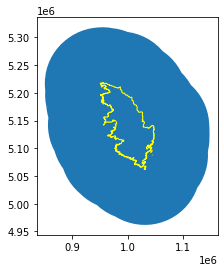

In [6]:
ax = gdf_emprise.buffer(100000).plot()
gdf_emprise.plot(ax=ax, edgecolor='yellow')

In [ ]:
fig, ax = plt.subplots(figsize=(60, 10))
plt.axis('off')
fig.set_dpi(150)

gdf_emprise.buffer(250000).plot(ax=ax, facecolor='none', edgecolor='none')
gdf_emprise.plot(ax=ax, facecolor='none', edgecolor='yellow')
cx.add_basemap(ax, source=ign_url)

plt.savefig('foo.png', bbox_inches="tight")